In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
import pickle
%matplotlib inline
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
stop=stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
df = pd.read_csv('spam.csv', sep='\t', names=["label", "message"])
df.shape

(5572, 2)

In [93]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [95]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [96]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

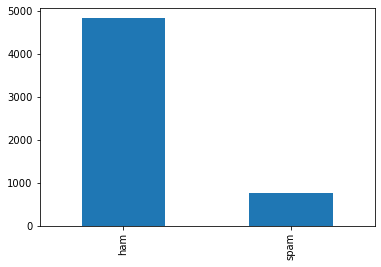

In [97]:
df.label.value_counts().plot.bar();

The above bar graph shows the number of ham messages are more in number compare to spam messages. This is the case of imbalanced data set and that is practically true also. 

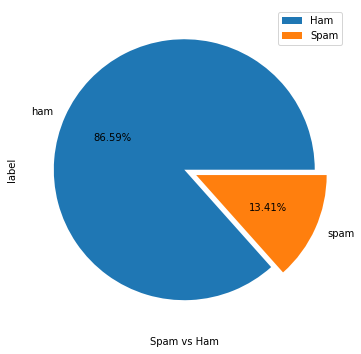

In [98]:
df["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.2f%%')
plt.xlabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Above pie chart tells the very less percentage of spam messages (13.41)

Assign a length column  to dataframe  to find the number of characters in each message.

In [99]:
df['length']=df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [100]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

It shows the messages of minimum length 2, maximum length of 910 and mean length of 80 characters.

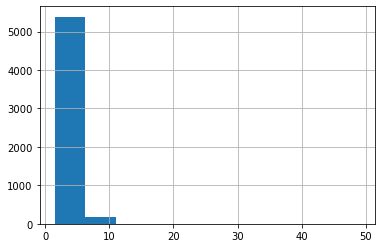

In [101]:
df['message'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

The average word length ranges between 2 to 10 with 5 being the most common length.

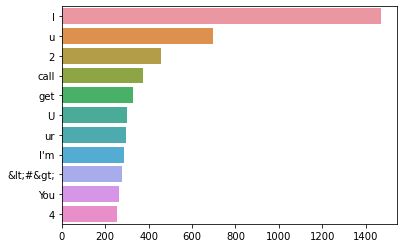

In [102]:
corpus=[]
text= df['message'].str.split()
text=text.values.tolist()
corpus=[word for i in text for word in i]

from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

The above barplot shows the characters 'I','U','2' and 'call' occured frequently,

add a new column spam_ham which indicates 0 as ham and 1 as spam. 

In [103]:
df['spam_ham'] = df['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(15)

,label,message,length,spam_ham
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,1
6,ham,Even my brother is not like to speak with me. ...,77,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0
8,spam,WINNER!! As a valued network customer you have...,157,1
9,spam,Had your mobile 11 months or more? U R entitle...,154,1


In [104]:
df_ham  = df[df['spam_ham'] == 0].copy()
df_spam = df[df['spam_ham'] == 1].copy()

In [105]:
import wordcloud
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

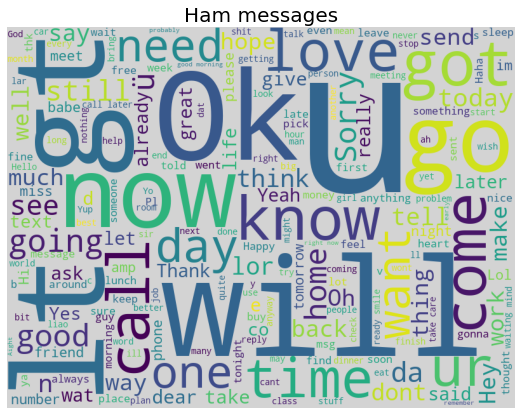

In [106]:
show_wordcloud(df_ham, "Ham messages")


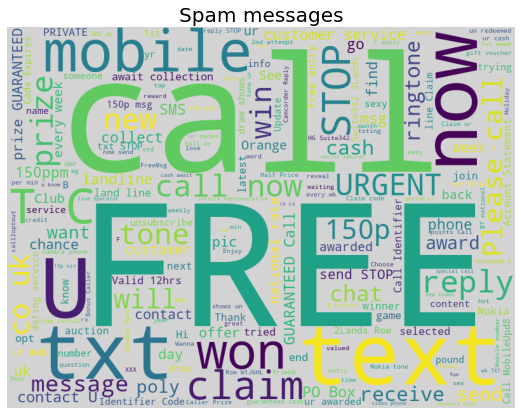

In [107]:
show_wordcloud(df_spam, "Spam messages")